In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [2]:
# populate list Data with the CSV
data = pd.read_csv("../data/A_Z Handwritten Data.csv").astype('float32')

# Split data the X - Our data , and y - the prdict label
X = data.drop('0', axis=1)
y = data['0']

#Split the data into training and test subsets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [3]:
#Turns the 784 columns of grayscale pixel data into 28X28 array of data
train_X = np.reshape(train_X.values, (train_X.shape[0], 28, 28))
test_X = np.reshape(test_X.values, (test_X.shape[0], 28, 28))

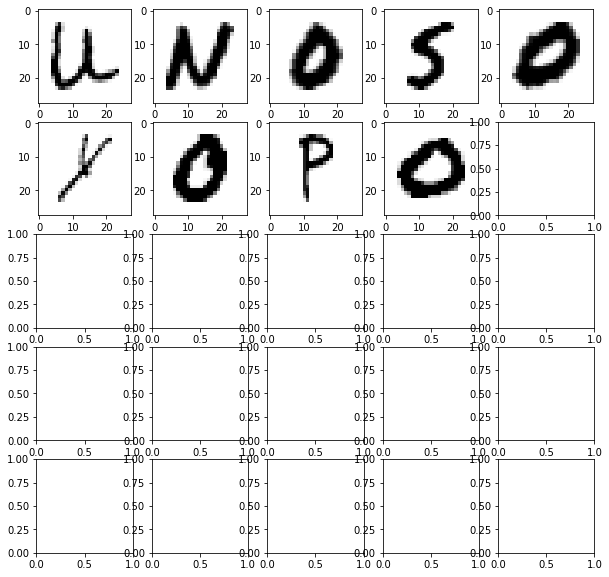

In [10]:
shuff = shuffle(train_X[:100])
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")
plt.show()

In [5]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1)

train_y = to_categorical(train_y, num_classes=26, dtype='int')
test_y = to_categorical(test_y, num_classes=26, dtype='int')

In [6]:
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M',
             13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y',
             25: 'Z'}

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True,
)

In [8]:
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=128, epochs= 1)
model.summary()
model.save(r'model_hand.h5')
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])


2328/2328 [==============================] - 168s 72ms/step - loss: 0.2352 - accuracy: 0.9423 - val_loss: 0.0727 - val_accuracy: 0.9802

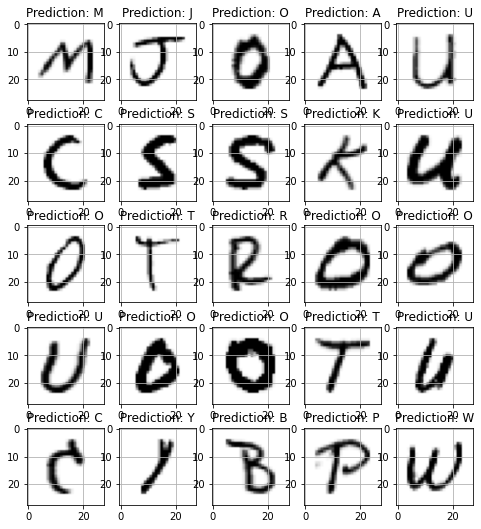

In [13]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")

    pred = word_dict[np.argmax(test_y[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()